<a href="https://colab.research.google.com/github/DavidMartinez16/Age-Predictor/blob/master/Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the GitHub Repository where all images are stored

In [1]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 15.61 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [3]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 138kB/s 
     |████████████████████████████████| 983kB 37.8MB/s 
     |████████████████████████████████| 245kB 42.8MB/s 
     |████████████████████████████████| 890kB 41.0MB/s 
     |████████████████████████████████| 471kB 41.3MB/s 
     |████████████████████████████████| 1.1MB 34.7MB/s 
     |████████████████████████████████| 3.0MB 43.9MB/s 
     |████████████████████████████████| 890kB 39.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.3-cp36-none-any.whl size=25270203 sha256=ae7e82f1a1fc03a7c13d15cb1bfea87c0dcdf1ef758443d8f90f64e8d62dcebb
  Stored in directory: /root/.cache/pip/wheels/d6/ef/6d/9428365b27ac1e84a77214c5718e7f8b2180007af593791247
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=40f7db824d57689bf108e14796e090a628cdf4ec5a1c65b044ac761b5896372a
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [4]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [5]:
# Split the age from the image file
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p = re.compile(pattern)
r = p.search('10_0_0_20170110220546177.jpg')
print(r.group(1))

10


In [6]:
DATADIR='/content/Image-Dataset-for-Age-Prediction/images'

In [7]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern=pattern, is_regression=True,
                      random_state=42)

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-f

Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:664: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:565: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'If this is incorrect, change accordingly.')


# View the available models to use in the transfer learning


In [8]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [9]:
# Select the resnet 50 model
model = vis.image_regression_model('pretrained_resnet50',train_data=train_data,
                                   val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 5s 0us/step
pretrained_resnet50 model created.


In [10]:
learner = ktrain.get_learner(model=model,
                             train_data=train_data,
                             val_data=test_data,
                             batch_size=64)

# Fit the resnet 50 model

In [14]:
learner.fit_onecycle(0.0001, epochs=3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
339/339 [==============================] - 350s 1s/step - loss: 248.0422 - mae: 11.9065 - val_loss: 193.3189 - val_mae: 10.5859
Epoch 2/3
339/339 [==============================] - 343s 1s/step - loss: 172.0913 - mae: 10.0315 - val_loss: 160.2808 - val_mae: 9.6170
Epoch 3/3
339/339 [==============================] - 343s 1s/step - loss: 144.5804 - mae: 9.1846 - val_loss: 153.8893 - val_mae: 9.3868


In [15]:
# Freeze the last 15 layers of resnet 50
learner.freeze(15)
learner.fit_onecycle(0.0001, epochs=3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
339/339 [==============================] - 367s 1s/step - loss: 106.0425 - mae: 7.9391 - val_loss: 115.5716 - val_mae: 7.7556
Epoch 2/3
339/339 [==============================] - 363s 1s/step - loss: 50.5814 - mae: 5.3716 - val_loss: 72.0914 - val_mae: 6.2297
Epoch 3/3
339/339 [==============================] - 371s 1s/step - loss: 27.2399 - mae: 3.9427 - val_loss: 65.8041 - val_mae: 5.9407


In [16]:
predictor = ktrain.get_predictor(learner.model, preproc)

# Select a random number of files to evaluate the performance of the model

In [31]:
test_data.filenames[40:50]

['3_0_0_20161219154705684.jpg',
 '14_1_4_20170109205457235.jpg',
 '30_0_1_20170117202910591.jpg',
 '3_1_2_20161219152927668.jpg',
 '65_0_0_20170117160554095.jpg',
 '47_1_1_20170113012000953.jpg',
 '35_1_3_20170104232853676.jpg',
 '71_0_2_20170112224020396.jpg',
 '31_1_0_20170117164753761.jpg',
 '25_0_3_20170119171159472.jpg']

In [20]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual_age = int(p.search(fname).group(1))
  vis.show_image(fname)
  print('Predicted Age: %s | Actual Age: %s' %(pred,actual_age))

# Make some predictions with the previous images

Predicted Age: 69.0 | Actual Age: 71


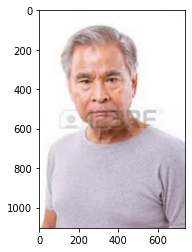

In [32]:
show_prediction('71_0_2_20170112224020396.jpg')

Predicted Age: 11.0 | Actual Age: 14


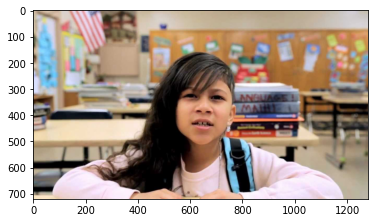

In [70]:
show_prediction('14_1_4_20170109205457235.jpg')

Predicted Age: 28.0 | Actual Age: 31


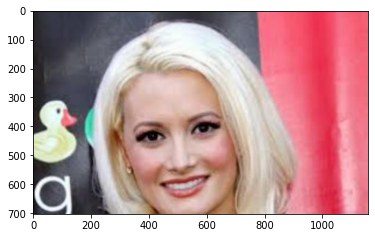

In [73]:
show_prediction('31_1_0_20170117164753761.jpg')

# Use some code snippets to take an image from the camera

In [33]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


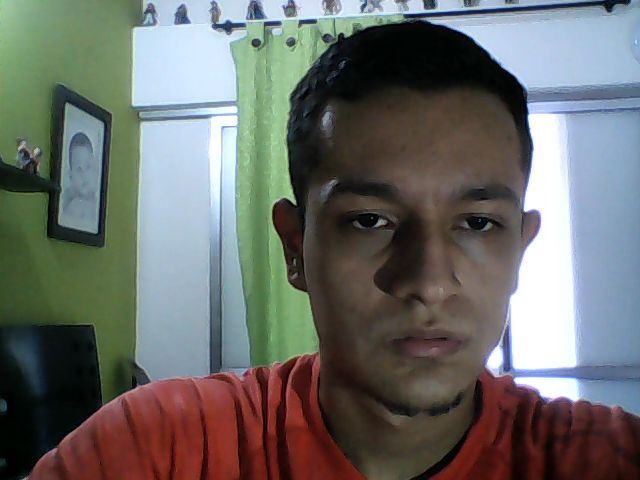

In [68]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Make a prediction with the previous taken photo

In [61]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print('Predicted Age: %s' %(pred))

## My real Age is 21, and the model predicts that my Age is 20

This doesn't necessarily means the model has a perfect performance, in fact, the prediction depends of features of the photo such as angle, lighthing, among others

Predicted Age: 20.0


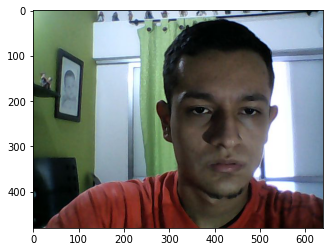

In [69]:
real_prediction('photo.jpg')

In [54]:
predictor.save('/content/age_prediction')

In [55]:
!zip -r /content/age_predictor.zip /content/age_prediction

  adding: content/age_prediction/ (stored 0%)
  adding: content/age_prediction/tf_model.h5 (deflated 9%)
  adding: content/age_prediction/tf_model.preproc (deflated 41%)
